## Learning Algorithms - Unsupervised Learning

>  Reminder:  In machine learning, the problem of unsupervised learning is that of trying to find hidden structure in unlabeled data. Since the training set given to the learner is unlabeled, there is no error or reward signal to evaluate a potential solution. Basically, we are just finding a way to represent the data and get as much information from it that we can.

HEY!  Remember PCA from above?  PCA is actually considered unsupervised learning.  We just put it up there because it's a good way to visualize data at the beginning of the ML process.

We are going to continue to use the `iris` dataset (however we won't be needed the targets or labels)

### Clustering
* KMeans

In [ ]:
from sklearn import cluster, datasets

# data
iris = datasets.load_iris()
X, y = iris.data, iris.target

k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X)

# how do our original labels fit into the clusters we found?
print(k_means.labels_[::10])
print(y[::10])


EXERCISE IDEA:  Iterate over different number of clusters, n_clusters param, in Kmeans

### Novelty detection aka anomaly detection

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


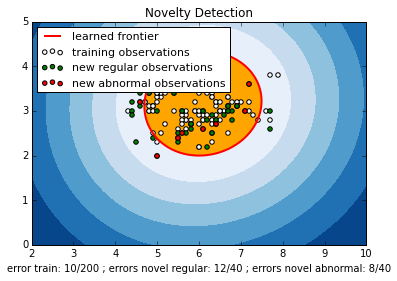

In [30]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split

# use seaborn plotting defaults
#import seaborn as sns; sns.set()

xx, yy = np.meshgrid(np.linspace(2, 10, 500), np.linspace(0, 5, 500))

# Iris data
iris = load_iris()
X, y = iris.data, iris.target
X = X[:, 0:2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)

# make some outliers
outlier_idxs = list(np.random.randint(0, len(X), 10))
X_outliers = X.take(outlier_idxs, axis = 0)

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='orange')

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red')
plt.axis('tight')
plt.xlim((2, 10))
plt.ylim((0, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()